In [8]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import re
from numpy import zeros

from labMTsimple.speedy import sentiDict
LabMT = sentiDict('LabMT',datastructure='dict',stopVal=1.0)
LabMT0 = sentiDict('LabMT',datastructure='dict',stopVal=0.0)

def mysavefig(name,date=True):
    if date:
        plt.savefig('{0}-{1}'.format(datetime.datetime.strftime(datetime.datetime.now(),'%Y-%m-%d-%H-%M'),name))
    else:
        plt.savefig('{1}'.format(name))
        
from os.path import isfile

missing rawtweets/climate/2009-05-14.txt
missing rawtweets/climate/2009-05-15.txt
missing rawtweets/climate/2009-05-16.txt
missing rawtweets/climate/2009-05-17.txt
missing rawtweets/climate/2009-05-18.txt
missing rawtweets/climate/2009-05-19.txt
missing rawtweets/climate/2009-05-20.txt
missing rawtweets/climate/2009-08-03.txt
missing rawtweets/climate/2009-08-04.txt
missing rawtweets/climate/2009-08-05.txt
missing rawtweets/climate/2009-12-18.txt
missing rawtweets/climate/2009-12-19.txt
missing rawtweets/climate/2009-12-20.txt
missing rawtweets/climate/2012-04-22.txt


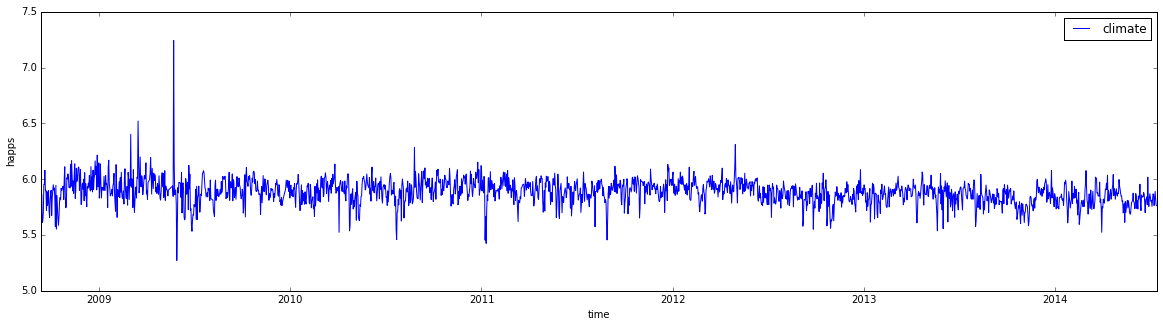

In [9]:
# input the day to start and end on
keyword = 'climate'
startday = '2008-09-11'
# endday = '2008-09-20'
endday = '2014-07-14'
startdate = datetime.datetime.strptime(startday,'%Y-%m-%d')
enddate = datetime.datetime.strptime(endday,'%Y-%m-%d')
resolution = datetime.timedelta(days=1)

date = startdate
dates = []
happs = []
freqs = []

climate_all_dict = dict()

while date <= enddate:
    if isfile(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-')))):
        f = open(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))),'r')
        rawtext = f.read()
        f.close()
        freq = len(rawtext.split('\n'))
        rawtextdict = dict()
        words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",rawtext,flags=re.UNICODE)]
        for word in words:
            if word in rawtextdict:
                rawtextdict[word] += 1
            else:
                rawtextdict[word] = 1
            if word in climate_all_dict:
                climate_all_dict[word] += 1
            else:
                climate_all_dict[word] = 1
        score = LabMT.scoreTrie(rawtextdict)
        if score > 0:
            dates.append(date)
            happs.append(score)
            freqs.append(freq)
    else:
        print(date.strftime('missing rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))))
    date += resolution

plt.figure(figsize=(20,5))
plt.plot(dates,happs)
# plt.ylim([4.5,7])
plt.ylabel('happs')
plt.xlabel('time')
plt.legend([keyword],loc='best')
mysavefig('climate-happs.png')

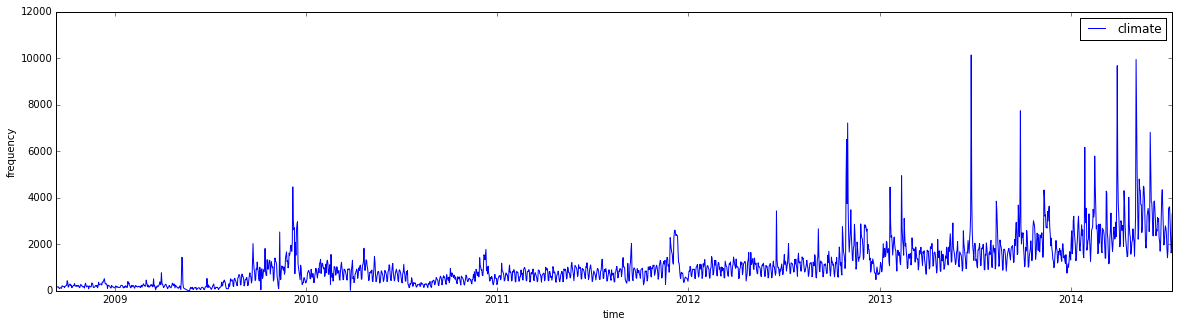

In [11]:
plt.figure(figsize=(20,5))
plt.plot(dates,freqs)
# plt.ylim([4.5,7])
plt.ylabel('frequency')
plt.xlabel('time')
plt.legend([keyword],loc='best')
mysavefig('climate-freq.png')

missing rawtweets/global-warming/2009-05-09.txt
missing rawtweets/global-warming/2009-05-10.txt
missing rawtweets/global-warming/2009-05-14.txt
missing rawtweets/global-warming/2009-05-15.txt
missing rawtweets/global-warming/2009-05-16.txt
missing rawtweets/global-warming/2009-05-17.txt
missing rawtweets/global-warming/2009-05-18.txt
missing rawtweets/global-warming/2009-05-19.txt
missing rawtweets/global-warming/2009-05-20.txt
missing rawtweets/global-warming/2009-08-03.txt
missing rawtweets/global-warming/2009-08-04.txt
missing rawtweets/global-warming/2009-08-05.txt
missing rawtweets/global-warming/2009-12-18.txt
missing rawtweets/global-warming/2009-12-19.txt
missing rawtweets/global-warming/2009-12-20.txt
missing rawtweets/global-warming/2012-04-22.txt


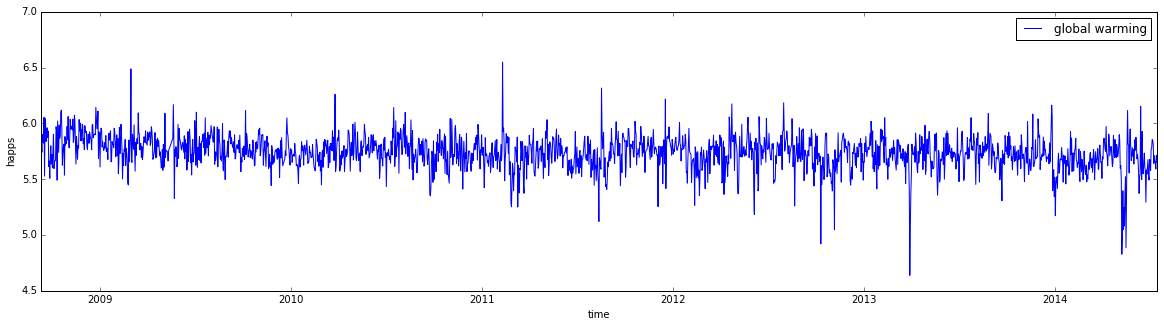

In [26]:
# input the day to start and end on
keyword = 'global warming'
startday = '2008-09-11'
# endday = '2008-09-20'
endday = '2014-07-14'
startdate = datetime.datetime.strptime(startday,'%Y-%m-%d')
enddate = datetime.datetime.strptime(endday,'%Y-%m-%d')
resolution = datetime.timedelta(days=1)

date = startdate
dates = []
happs = []
freqs = []

gw_all_dict = dict()

while date <= enddate:
    if isfile(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-')))):
        f = open(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))),'r')
        rawtext = f.read()
        f.close()
        freq = len(rawtext.split('\n'))
        rawtextdict = dict()
        words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",rawtext,flags=re.UNICODE)]
        for word in words:
            if word in rawtextdict:
                rawtextdict[word] += 1
            else:
                rawtextdict[word] = 1
            if word in gw_all_dict:
                gw_all_dict[word] += 1
            else:
                gw_all_dict[word] = 1
        if 'global' in rawtextdict:
            rawtextdict['global'] = 0
        score = LabMT.scoreTrie(rawtextdict)
        if score > 0:
            dates.append(date)
            happs.append(score)
            freqs.append(freq)
    else:
        print(date.strftime('missing rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))))
        
    date += resolution

plt.figure(figsize=(20,5))
plt.plot(dates,happs)
# plt.ylim([4.5,7])
plt.ylabel('happs')
plt.xlabel('time')
plt.legend([keyword],loc='best')
mysavefig('global-warming-happs.png')

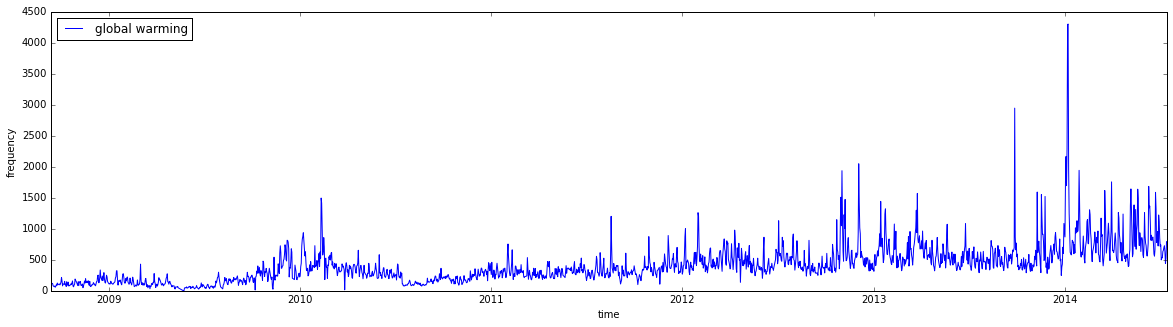

In [13]:
plt.figure(figsize=(20,5))
plt.plot(dates,freqs)
# plt.ylim([4.5,7])
plt.ylabel('frequency')
plt.xlabel('time')
plt.legend([keyword],loc='best')
plt.savefig('global-warming-freq.png')

In [23]:
a = LabMT0.wordVecify(climate_all_dict)
f = open('climate_all_words.csv','w')
f.write('\n'.join(['{0:.0f}'.format(x) for x in a]))
f.close()

In [24]:
b = LabMT0.wordVecify(gw_all_dict)
f = open('gw_all_words.csv','w')
f.write('\n'.join(['{0:.0f}'.format(x) for x in b]))
f.close()

In [11]:
# write out word vectors for everything for emily
startday = '2008-09-11'
endday = '2014-07-14'
startdate = datetime.datetime.strptime(startday,'%Y-%m-%d')
enddate = datetime.datetime.strptime(endday,'%Y-%m-%d')
resolution = datetime.timedelta(days=1)

for keyword in ['climate','global warming','globalwarming','climaterealists','agw','climatechange']:
    date = startdate
    while date <= enddate:
        if isfile(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-')))):
            f = open(date.strftime('rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))),'r')
            rawtext = f.read()
            f.close()
            rawtextdict = dict()
            words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",rawtext,flags=re.UNICODE)]
            for word in words:
                if word in rawtextdict:
                    rawtextdict[word] += 1
                else:
                    rawtextdict[word] = 1
            if not isfile(date.strftime('rawtweets/{0}/%Y-%m-%d.csv'.format(keyword.replace(' ','-')))):
                word_vec = LabMT0.wordVecify(rawtextdict)
                f = open(date.strftime('rawtweets/{0}/%Y-%m-%d.csv'.format(keyword.replace(' ','-'))),'w')
                f.write('\n'.join(['{0:.0f}'.format(x) for x in word_vec]))
                f.close()
        else:
            print(date.strftime('missing rawtweets/{0}/%Y-%m-%d.txt'.format(keyword.replace(' ','-'))))
            if not isfile(date.strftime('rawtweets/{0}/%Y-%m-%d.csv'.format(keyword.replace(' ','-')))):
                word_vec = zeros(10222)
                f = open(date.strftime('rawtweets/{0}/%Y-%m-%d.csv'.format(keyword.replace(' ','-'))),'w')
                f.write('\n'.join(['{0:.0f}'.format(x) for x in word_vec]))
                f.close()
        date += resolution

missing rawtweets/climate/2009-05-14.txt
missing rawtweets/climate/2009-05-15.txt
missing rawtweets/climate/2009-05-16.txt
missing rawtweets/climate/2009-05-17.txt
missing rawtweets/climate/2009-05-18.txt
missing rawtweets/climate/2009-05-19.txt
missing rawtweets/climate/2009-05-20.txt
missing rawtweets/climate/2009-08-03.txt
missing rawtweets/climate/2009-08-04.txt
missing rawtweets/climate/2009-08-05.txt
missing rawtweets/climate/2009-12-18.txt
missing rawtweets/climate/2009-12-19.txt
missing rawtweets/climate/2009-12-20.txt
missing rawtweets/climate/2012-04-22.txt
missing rawtweets/global-warming/2009-05-09.txt
missing rawtweets/global-warming/2009-05-10.txt
missing rawtweets/global-warming/2009-05-14.txt
missing rawtweets/global-warming/2009-05-15.txt
missing rawtweets/global-warming/2009-05-16.txt
missing rawtweets/global-warming/2009-05-17.txt
missing rawtweets/global-warming/2009-05-18.txt
missing rawtweets/global-warming/2009-05-19.txt
missing rawtweets/global-warming/2009-05-2